## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [35]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [26]:
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [99]:
uber_copy = uber_data.copy()
columns = ['trip_time', 'total_time', 'wait_time']

def time_convert(column):
    new = []
    for text in uber_copy[column]:
        time = text.split(':')
        final_time = int(time[1]) + (int(time[0])*60) + (int(time[2])/60)
        new.append(final_time)
    uber_copy.drop([column], axis=1)
    uber_copy[column] = new

for col in columns: time_convert(col)

uber_copy.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,21.550000,29.0,7.450000,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,19.450000,26.0,6.550000,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883333,83.0,16.116667,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,13.616667,20.0,6.383333,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,38.900000,49.0,10.100000,665,13.43,21.92,3,1,0.90,1.61,0.31


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

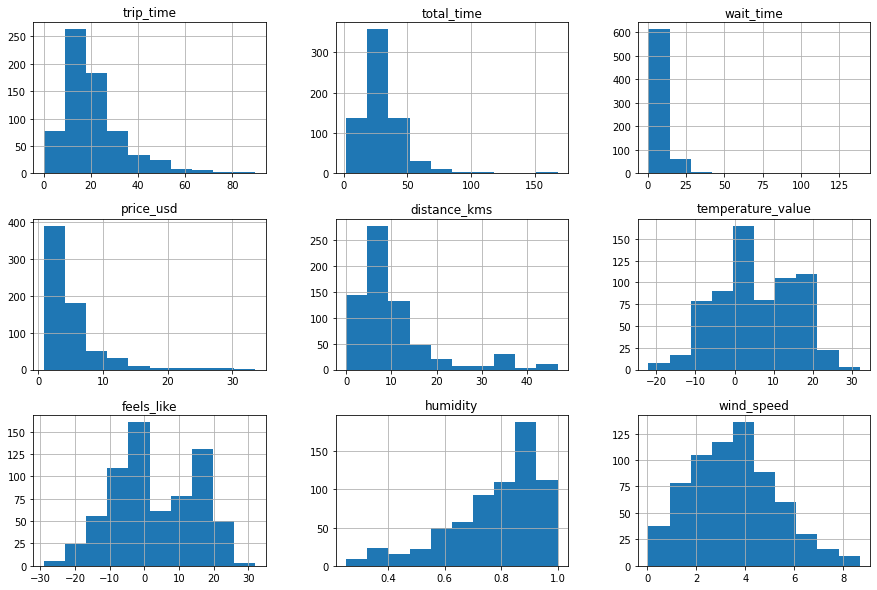

In [100]:
uber_copy.hist(column=['trip_time', 'total_time', 'wait_time', 'price_rub', 
                       'price_usd', 'distance_kms', 'temperature_value', 
                       'feels_like', 'humidity', 'wind_speed', 'cloudness'], figsize=(15,10))
plt.show()

### Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

*total_time and wait_time appears to have outliers that are correct values that are just unusually large.*

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

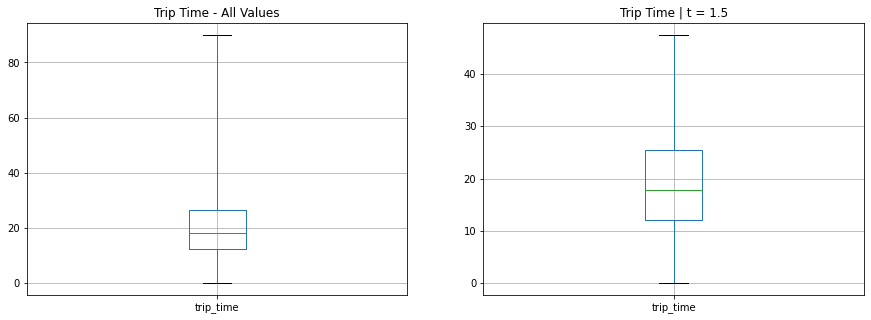

In [110]:
tukey = uber_copy.copy()

threshold = 1.5
q75, q25 = np.percentile(tukey['trip_time'], [75,25])
iqr = q75-q25
min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
tukey[['trip_time']].boxplot(whis=5)
plt.title('Trip Time - All Values')
plt.subplot(1,2,2)
tukey.loc[(tukey['trip_time'] < max_val) &
              (tukey['trip_time'] > min_val),
              ['trip_time']].boxplot(whis=5)
plt.title('Trip Time | t = 1.5')
plt.show()

*There are no outliers on trip_time after setting the threshold to 1.5*

There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

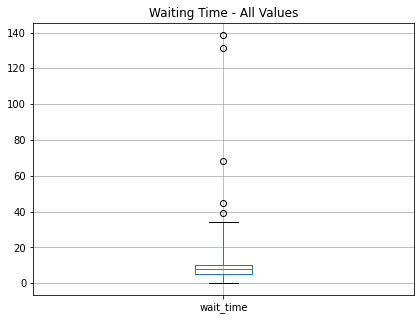

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
uber_copy[['wait_time']].boxplot(whis=5)
plt.title('Waiting Time - All Values')
plt.show()

In [121]:
from scipy.stats.mstats import winsorize

In [123]:
# winsorization happens here
winsorized_wait = winsorize(uber_copy['wait_time'], (0, 0.05))

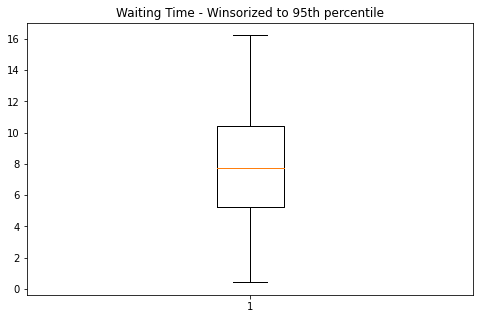

In [126]:
plt.figure(figsize=(8,5))
plt.boxplot(winsorized_wait, whis = 5)
plt.title('Waiting Time - Winsorized to 95th percentile')
plt.show()